# Assignment 6
This assignment requires you to work with Facebook network data, data preprocessing and networkx. Note that this is real data from real people!

## Part 1: Preparing data
The dataset you will be working with is available here: https://snap.stanford.edu/data/egonets-Facebook.html

You're first job is to

1. Download the data
2. Unpack the data
3. Import the data as an undirected graph in networkx

This should all be done from your notebook in Python. This is an important step for you to automate data preprocessing.

Note: this could take a while, so if you feel adventurous you can use the multiprocessing library to speed things up.

Hand-in:
- The code for downloading, unpacking and loading the dataset

## Part 2: Analyse the data
Now, let's take a look at the network you imported.

By node degree we mean the number of edges to and from a node. This is different in an undirected network, where in-degree == out-degree, and a directed network where in-degree != out-degree.

By graph degree we mean the number of edges in the entire network.

Hand-in code that display:
- The number of nodes in the network
- The number of edges in the network
- The average degree in the network
- A visualisation of the network inside your notebook

## Part 3: Find the most popular people
We're naturally interested in who has the most friends, so we want to extract top 10. That is, the 10 most connected people.

Hand-in:
- Code that extracts and reports the 10 people with the most connections in the network

In [1]:
import requests
import gzip
import shutil
from glob import glob
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot

### Part 1

In [2]:
def get_data_from_url(url):
    # downloading data
    response = requests.get(url)
    
    zipfilename = url.split('/')[-1]
    filename = zipfilename.replace('.gz','')
    
    if response.ok:  # status_code == 200:
        # opens the file
        with open(zipfilename, 'wb') as f:
            f.write(response.content)
    
    # extracting filename
    with gzip.open(zipfilename, 'rb') as f_in:
        with open(filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    # finding the file
    local_file = glob('*_combined')[0]
    return local_file

In [3]:
url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
filename = get_data_from_url(url)
graph = nx.read_edgelist(filename)

### Part 2

In [8]:
def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=False, node_color=range(len(graph)))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


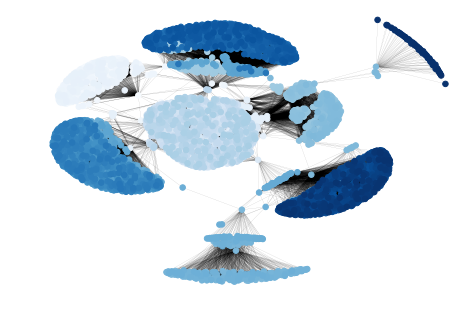

In [9]:
print(nx.info(graph))
#draw_graph(graph) # virker ikke i mybinder pga. ()

### Part 3

In [6]:
import numpy as np

GLOBAL_PR = np.ones(graph.number_of_nodes())

def page_rank(node):
    n = graph.number_of_nodes()
    damping = 0.85

    pr_in = np.array([GLOBAL_PR[int(remote)] for remote, _ in graph.edges(node)])
    c = np.array([graph.degree(remote) for remote, _ in graph.edges(node)])
    pr_p = ((1 - damping) / n) + (damping * np.sum(pr_in / c))

    return pr_p
        

def compute_page_rank_step(graph):
    return np.array([page_rank(n) for n in graph.nodes()])
    
    
def compute_page_rank(graph, no_it=100):
    global GLOBAL_PR
    if no_it == 'converge':
        converged = False
        it_count = 0
        while not converged:
            new_pr = compute_page_rank_step(graph)
            converged = np.array_equal(GLOBAL_PR, new_pr)
            GLOBAL_PR = new_pr 
            it_count += 1
            
        print('It took me {} iterations to converge'.format(it_count))
    else:
        for idx in range(no_it):
            GLOBAL_PR = compute_page_rank_step(graph)
            
compute_page_rank(graph, no_it='converge')

It took me 381 iterations to converge


In [7]:
sorted_GLOBAL_PR = sorted(zip(GLOBAL_PR,range(graph.number_of_nodes())),key= lambda x: x[0],reverse=True)
print(sorted_GLOBAL_PR[:10])

[(0.0002475860361475619, 14), (0.0002475860361475619, 20), (0.0002475860361475619, 39), (0.0002475860361475619, 57), (0.0002475860361475619, 66), (0.0002475860361475619, 144), (0.0002475860361475619, 227), (0.0002475860361475619, 258), (0.0002475860361475617, 21), (0.0002475860361475617, 48)]
